In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
import requests


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
#import all the necessary liabriries requried if needed with insert more 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
#drop unnecarry column

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
df.shape
# 16468 rows 
#13 columns 

(16468, 13)

In [6]:
df.info()
#we have to change the date columns as showing object
#type and region is in object we have to chang elater needs to check 
#rest of the data is float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()
# no null values in data set

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
print(df.columns)

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


In [9]:

df['Date'] = pd.to_datetime(df['Date'])
#changing date to date_time

In [10]:

# function for checking missing values
def missing_val(x):
    missing = {}
    for i in df.columns:
        if df[i].isnull().sum()> 0:
            missing[i] = df[i].isnull().sum()
    print(missing,end = " ")

In [11]:
# calling the function
missing_val(df)
print('Percentage of missing data ',df.isnull().sum()/len(df)*100)
#we have seen that actual data points are only 1517 out of 16000 plus observations. approx 91% data is missing and we cant impute it, we will have to delete them.

{'Date': 14951, 'AveragePrice': 14951, 'Total Volume': 14951, '4046': 14951, '4225': 14951, '4770': 14951, 'Total Bags': 14951, 'Small Bags': 14951, 'Large Bags': 14951, 'XLarge Bags': 14951, 'type': 14951, 'year': 14951, 'region': 14951} Percentage of missing data  Date            90.788195
AveragePrice    90.788195
Total Volume    90.788195
4046            90.788195
4225            90.788195
4770            90.788195
Total Bags      90.788195
Small Bags      90.788195
Large Bags      90.788195
XLarge Bags     90.788195
type            90.788195
year            90.788195
region          90.788195
dtype: float64


In [12]:
df.describe()
#By checking data point, i have found that small and large bags are bifurcation(related) of total bags so we can keep only total bags instead of them.we will treat them in coming section

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [13]:
df.select_dtypes(include='object').describe()
#From this we can understand that all Avocado belongs to one category which is conventional and dataset has maximum data from california state

,type,region
count,1517,1517
unique,1,51
top,conventional,California
freq,1517,76


Text(0.5, 1.0, 'Average Price')

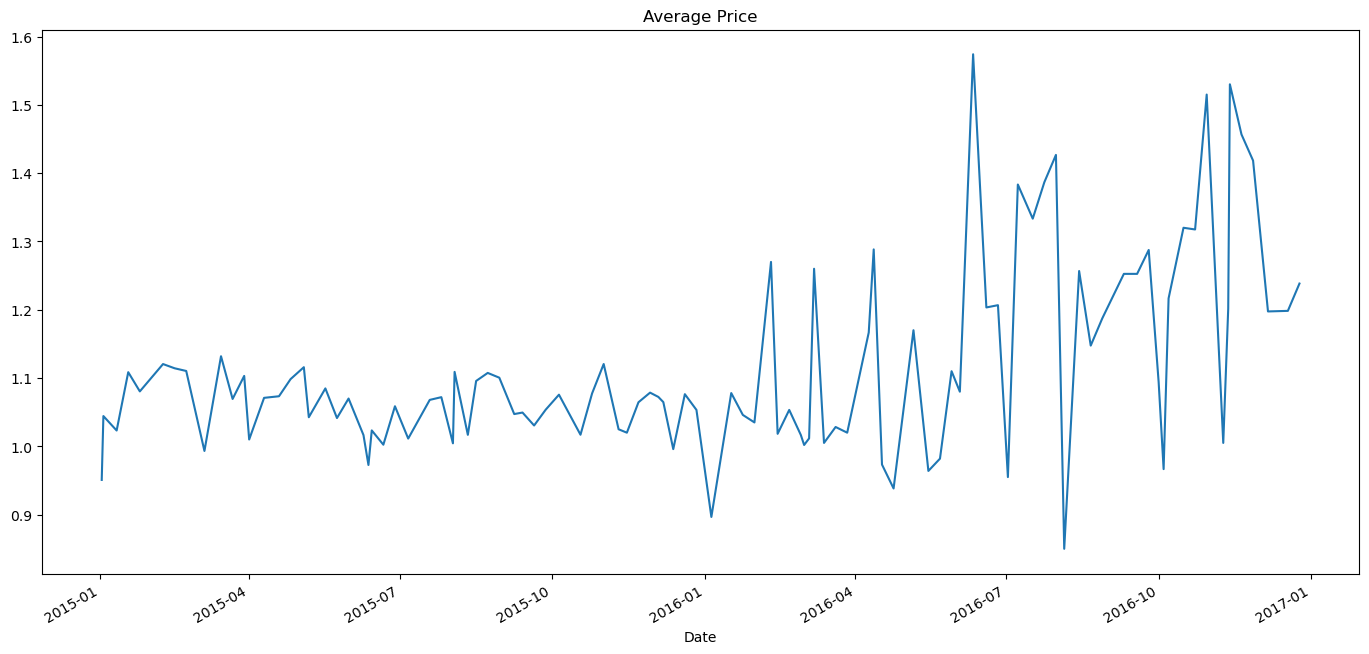

In [14]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(17,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')
#average price if each year for Avocado 

Text(0.5, 1.0, 'Average Price')

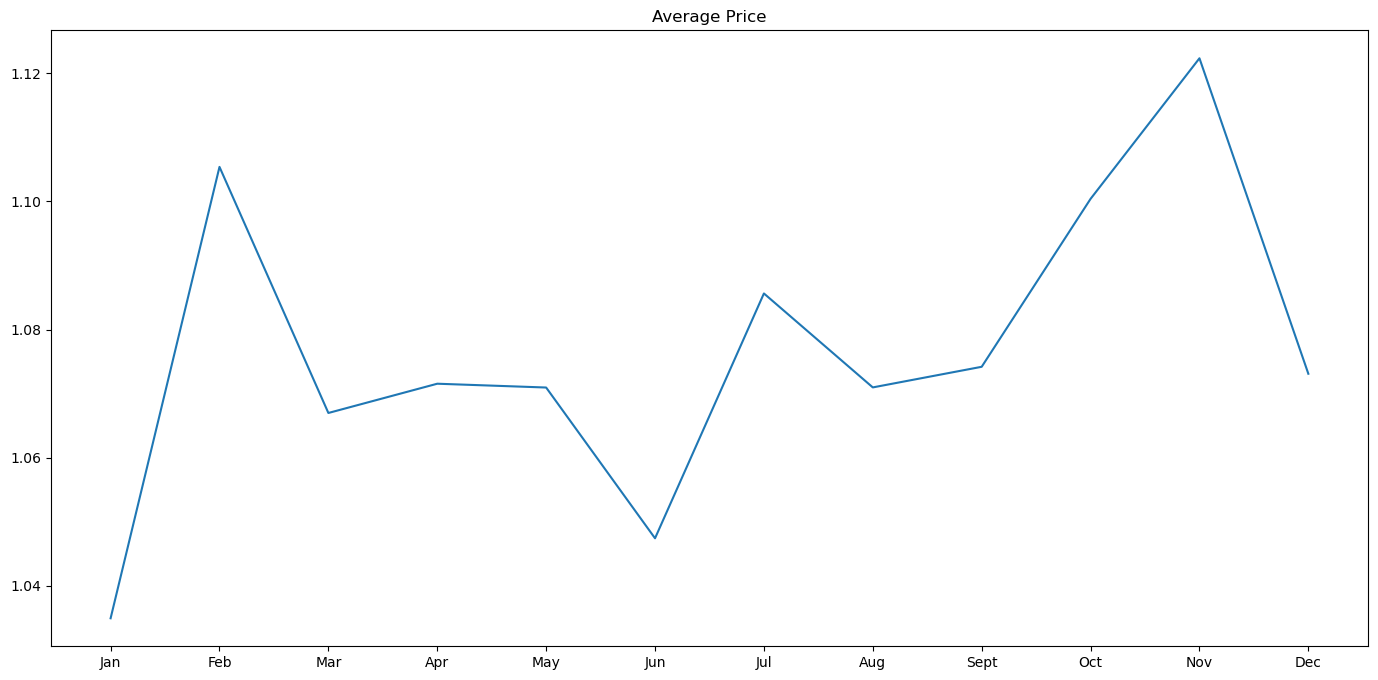

In [15]:
df['Month']=df['Date'].apply(lambda x:x.month)
byMonth =df.groupby('Month').mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['AveragePrice'])
plt.title('Average Price')
#average price if each month  for Avocado 
#apply  lambda funcition to check for a month 
#price rises for a while in February  then falls in from march till jun then rise  and again rise in july and continously rising then on thye peak in nov .

<AxesSubplot:title={'center':'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

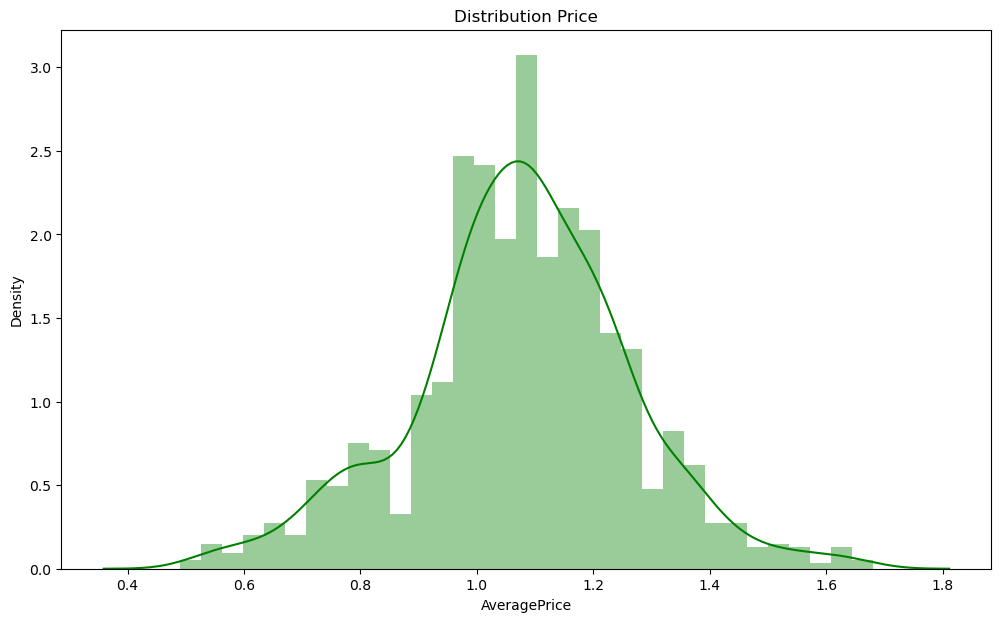

In [16]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='g')
#checked again Average price is distplot

In [17]:
df.rename(columns={'4046':'Small4046','4225':'Large4225','4770':'Extra_large4770'},inplace=True)
df

,Date,AveragePrice,Total Volume,Small4046,Large4225,Extra_large4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.skew()
#all the columns are skewed . we will treat them after EDA.


AveragePrice      -0.109444
Total Volume       6.200138
Small4046          6.051830
Large4225          6.394926
Extra_large4770    5.405164
Total Bags         5.366378
Small Bags         5.355185
Large Bags         5.144495
XLarge Bags        5.775077
year               1.828332
Month              0.101439
dtype: float64

In [19]:
df.groupby("region")[["Total Volume","AveragePrice"]].mean().sort_values(by ="Total Volume" ,ascending = False)
#Top 5 region where it has consumed a lot and those are California,west,southcentral , northeast and greatlakes.

,Total Volume,AveragePrice
region,,
TotalUS,3.293714e+07,1.011600
California,6.035277e+06,1.055921
West,5.574939e+06,0.940833
SouthCentral,5.496995e+06,0.818718
Northeast,3.465864e+06,1.236667
GreatLakes,3.276358e+06,1.107222
Southeast,3.055239e+06,1.091111
LosAngeles,2.732180e+06,0.863333
Midsouth,2.355099e+06,1.081111


In [20]:
#as we have checked in describe needs to drop few columns that are similar to each other 
#they are Small Bags,Large Bags

df.drop(columns=["Small Bags","Large Bags"],axis = 1, inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'Syracuse'),
  Text(1, 0, 'Charlotte'),
  Text(2, 0, 'BuffaloRochester'),
  Text(3, 0, 'Philadelphia'),
  Text(4, 0, 'StLouis'),
  Text(5, 0, 'NewYork'),
  Text(6, 0, 'Albany'),
  Text(7, 0, 'Northeast'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'HartfordSpringfield'),
  Text(10, 0, 'Boston'),
  Text(11, 0, 'Pittsburgh'),
  Text(12, 0, 'MiamiFtLauderdale'),
  Text(13, 0, 'RaleighGreensboro'),
  Text(14, 0, 'BaltimoreWashington'),
  Text(15, 0, 'HarrisburgScranton'),
  Text(16, 0, 'SanFrancisco'),
  Text(17, 0, 'GrandRapids'),
  Text(18, 0, 'Orlando'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'NorthernNewEngland'),
  Text(22, 0, 'GreatLakes'),
  Text(23, 0, 'Roanoke'),
  Text(24, 0, 'Spokane'),
  Text(25, 0, 'Southea

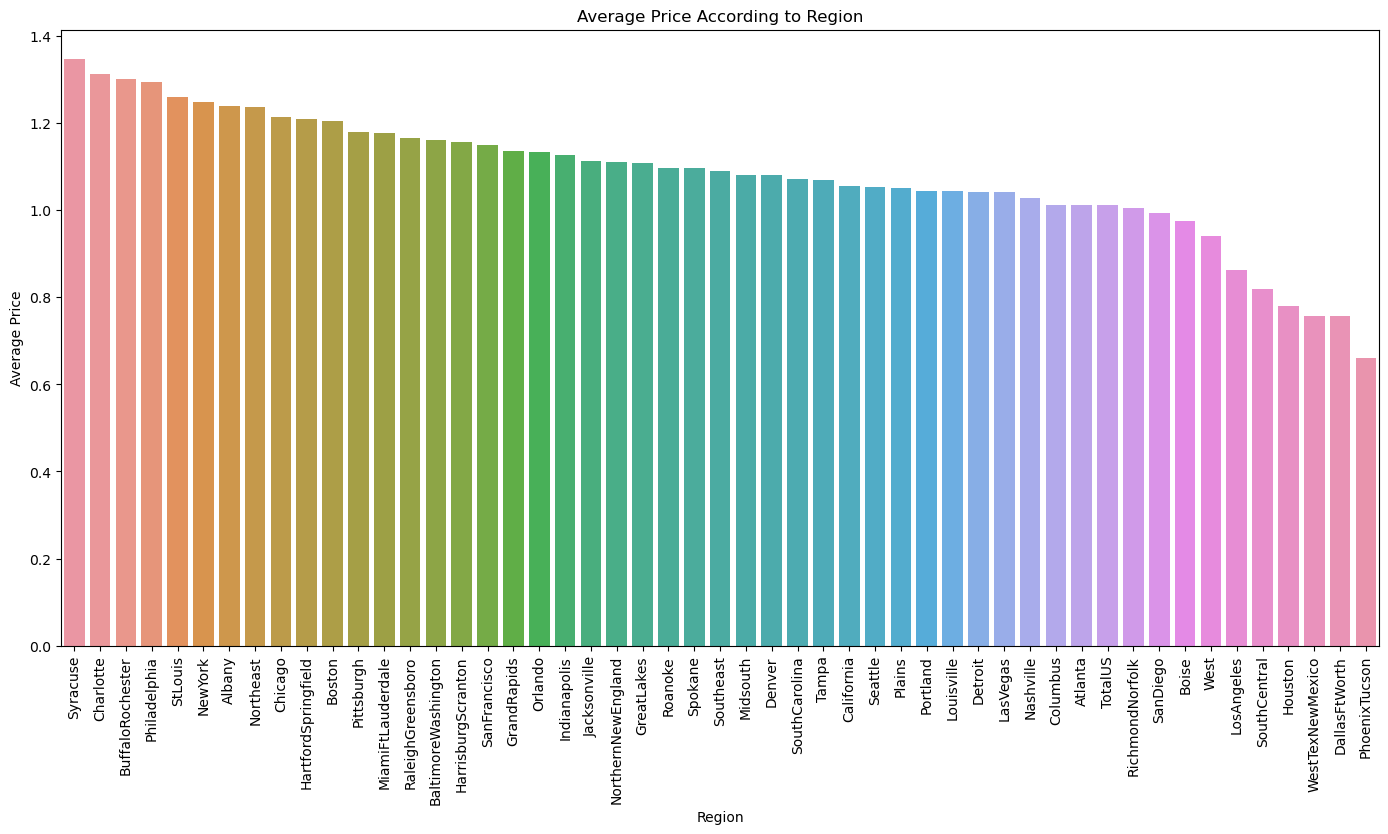

In [21]:
byregion = df.groupby('region').mean()
byregion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8))
sns.barplot(x=byregion.index,y=byregion['AveragePrice'],data=byregion)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')
plt.xticks(rotation=90)
#The barplot shows the average price of avocado at various regions in a ascending order. Clearly Hartford Springfield, SanFrancisco, NewYork are the regions with the highest avocado prices.

<AxesSubplot:>

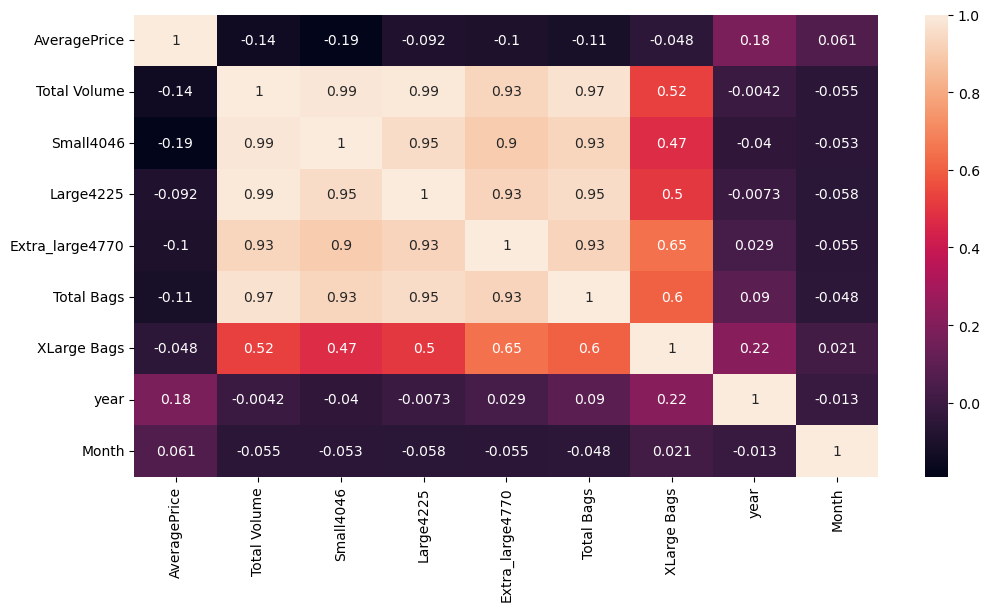

In [22]:
corr_df = df.corr()
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,annot=True)
#As we can from the heatmap above, all the Features are not correlated with the Average Price column, instead most of them are correlated with each other.

In [23]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df.head()

,Date,AveragePrice,Total Volume,Small4046,Large4225,Extra_large4770,Total Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.0,0,2015.0,0,12.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.0,0,2015.0,0,12.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.0,0,2015.0,0,12.0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.0,0,2015.0,0,6.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.0,0,2015.0,0,11.0


In [24]:
df['type'],df['region']
#look the data that we have convertaed

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 16463    1
 16464    1
 16465    1
 16466    1
 16467    1
 Name: type, Length: 16468, dtype: int32,
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 16463    51
 16464    51
 16465    51
 16466    51
 16467    51
 Name: region, Length: 16468, dtype: int32)

In [25]:
# dropping null value
df.dropna(inplace=True)
missing_val(df) # checking missing value again

{} 

In [26]:
df.drop('Date',axis=1,inplace=True)

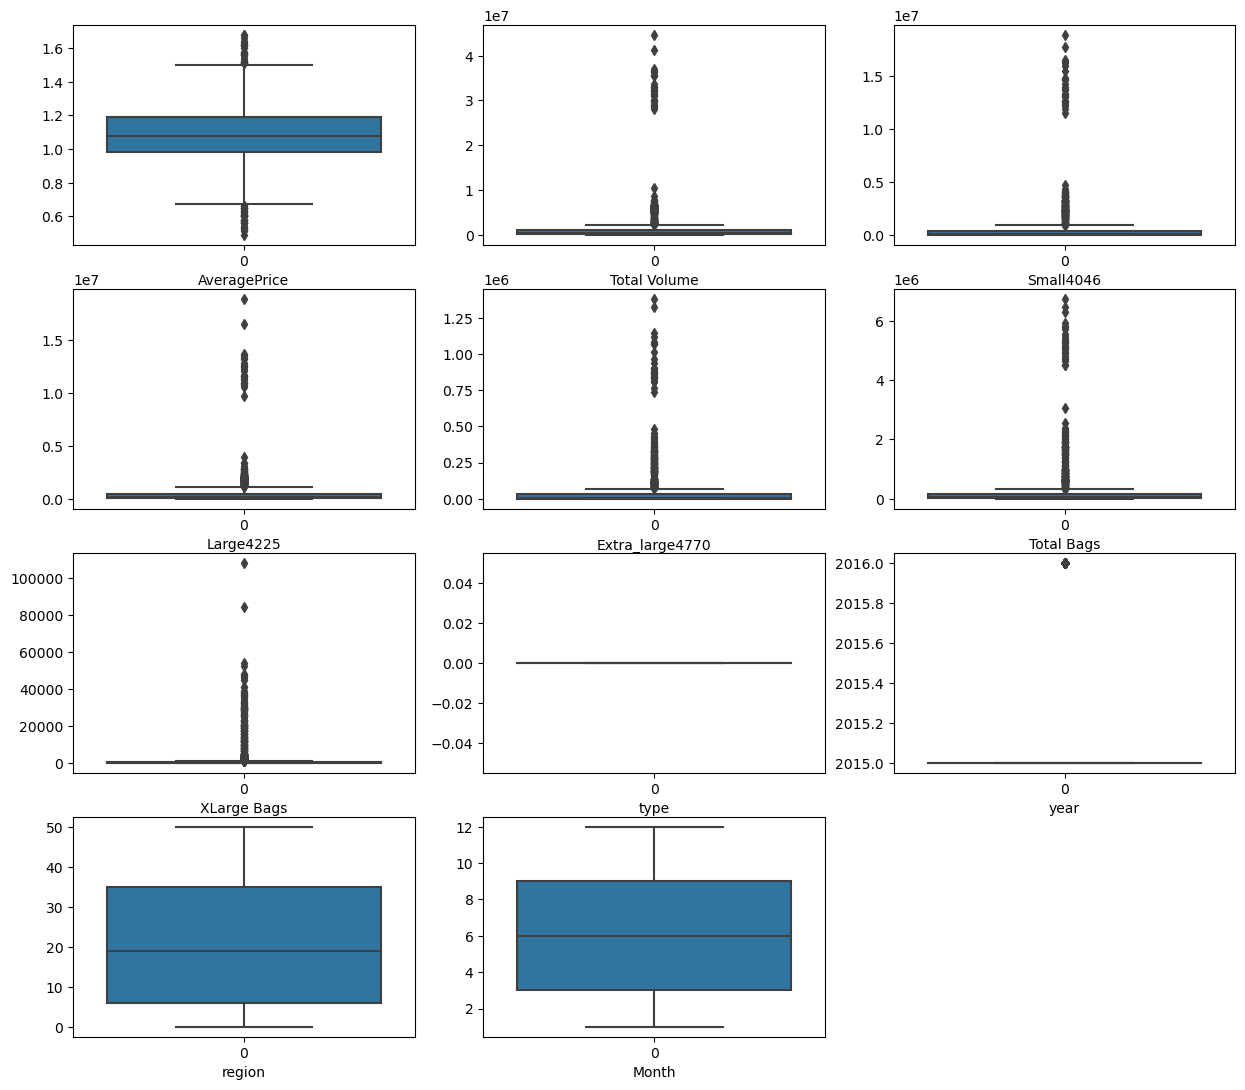

In [27]:
plt.figure(figsize=(15,20))

plotnumber = 1

for c in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
    

In [28]:
df.rename(columns={'Total Volume':'Total_Volume','Total Bags':'Total_Bags','XLarge Bags':'XLarge_Bags'},inplace=True)
df
#data name change to treatingoutliers as there is space in word so it will not allow 

,AveragePrice,Total_Volume,Small4046,Large4225,Extra_large4770,Total_Bags,XLarge_Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.00,0,2015.0,0,12.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.00,0,2015.0,0,12.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.00,0,2015.0,0,12.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.00,0,2015.0,0,6.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.00,0,2015.0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,240.28,0,2016.0,7,10.0
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,0.00,0,2016.0,7,9.0
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,825.00,0,2016.0,7,2.0
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,0.00,0,2016.0,7,9.0


In [29]:
q1 = df.quantile(0.25)

q3 =df.quantile(0.75)

iqr = q3-q1
#iqr method for treating outlier

In [30]:
Average_Price = (q3.AveragePrice + (1.5 * iqr.AveragePrice))

abc = np.where(df['AveragePrice'] > Average_Price)

df = df.drop(df.index[abc])

df.reset_index()
#for Average_Price 

,index,AveragePrice,Total_Volume,Small4046,Large4225,Extra_large4770,Total_Bags,XLarge_Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.00,0,2015.0,0,12.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.00,0,2015.0,0,12.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.00,0,2015.0,0,12.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.00,0,2015.0,0,6.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.00,0,2015.0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,1505,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,0.00,0,2016.0,7,4.0
1487,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,240.28,0,2016.0,7,10.0
1488,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,825.00,0,2016.0,7,2.0
1489,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,0.00,0,2016.0,7,9.0


In [31]:
Small_4046 = (q3.Small4046 + (1.5 * iqr.Small4046))

abc = np.where(df['Small4046'] > Small_4046)

df = df.drop(df.index[abc])

df.reset_index()
#for Small4046 

,index,AveragePrice,Total_Volume,Small4046,Large4225,Extra_large4770,Total_Bags,XLarge_Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.00,0,2015.0,0,12.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.00,0,2015.0,0,12.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.00,0,2015.0,0,12.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.00,0,2015.0,0,6.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.00,0,2015.0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1278,1505,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,0.00,0,2016.0,7,4.0
1279,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,240.28,0,2016.0,7,10.0
1280,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,825.00,0,2016.0,7,2.0
1281,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,0.00,0,2016.0,7,9.0


In [32]:
Large_4225 = (q3.Large4225 + (1.5 * iqr.Large4225))

abc = np.where(df['Large4225'] > Large_4225)

df = df.drop(df.index[abc])

df.reset_index()
#for Large4225 

,index,AveragePrice,Total_Volume,Small4046,Large4225,Extra_large4770,Total_Bags,XLarge_Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.00,0,2015.0,0,12.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.00,0,2015.0,0,12.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.00,0,2015.0,0,12.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.00,0,2015.0,0,6.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.00,0,2015.0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1505,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,0.00,0,2016.0,7,4.0
1228,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,240.28,0,2016.0,7,10.0
1229,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,825.00,0,2016.0,7,2.0
1230,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,0.00,0,2016.0,7,9.0


In [33]:
Extralarge4770 = (q3.Extra_large4770 + (1.5 * iqr.Extra_large4770))

abc = np.where(df['Extra_large4770'] > Extralarge4770)

df = df.drop(df.index[abc])

df.reset_index()
#Extra_large4770

,index,AveragePrice,Total_Volume,Small4046,Large4225,Extra_large4770,Total_Bags,XLarge_Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.00,0,2015.0,0,12.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.00,0,2015.0,0,12.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.00,0,2015.0,0,12.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.00,0,2015.0,0,6.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.00,0,2015.0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1505,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,0.00,0,2016.0,7,4.0
1166,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,240.28,0,2016.0,7,10.0
1167,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,825.00,0,2016.0,7,2.0
1168,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,0.00,0,2016.0,7,9.0


In [34]:
TotalVolume = (q3.Total_Volume + (1.5 * iqr.Total_Volume))

abc = np.where(df['Total_Volume'] > TotalVolume)

df = df.drop(df.index[abc])

df.reset_index()
#for Total_Volume

,index,AveragePrice,Total_Volume,Small4046,Large4225,Extra_large4770,Total_Bags,XLarge_Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.00,0,2015.0,0,12.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.00,0,2015.0,0,12.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.00,0,2015.0,0,12.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.00,0,2015.0,0,6.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.00,0,2015.0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1505,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,0.00,0,2016.0,7,4.0
1166,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,240.28,0,2016.0,7,10.0
1167,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,825.00,0,2016.0,7,2.0
1168,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,0.00,0,2016.0,7,9.0


In [35]:
TotalBags = (q3.Total_Bags + (1.5 * iqr.Total_Bags))

abc = np.where(df['Total_Bags'] > TotalBags)

df = df.drop(df.index[abc])

df.reset_index()
#for TotalBags

,index,AveragePrice,Total_Volume,Small4046,Large4225,Extra_large4770,Total_Bags,XLarge_Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.00,0,2015.0,0,12.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.00,0,2015.0,0,12.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.00,0,2015.0,0,12.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.00,0,2015.0,0,6.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.00,0,2015.0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1505,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,0.00,0,2016.0,7,4.0
1155,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,240.28,0,2016.0,7,10.0
1156,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,825.00,0,2016.0,7,2.0
1157,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,0.00,0,2016.0,7,9.0


In [36]:
XLargeBags = (q3.XLarge_Bags + (1.5 * iqr.XLarge_Bags))

abc = np.where(df['XLarge_Bags'] > XLargeBags)

df = df.drop(df.index[abc])

df.reset_index()
#for XLarge_Bags

,index,AveragePrice,Total_Volume,Small4046,Large4225,Extra_large4770,Total_Bags,XLarge_Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.00,0,2015.0,0,12.0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.00,0,2015.0,0,12.0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.00,0,2015.0,0,12.0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.00,0,2015.0,0,6.0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.00,0,2015.0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1505,1.34,154742.81,39221.82,46285.90,9451.98,59783.11,0.00,0,2016.0,7,4.0
1046,1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,240.28,0,2016.0,7,10.0
1047,1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,825.00,0,2016.0,7,2.0
1048,1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,0.00,0,2016.0,7,9.0


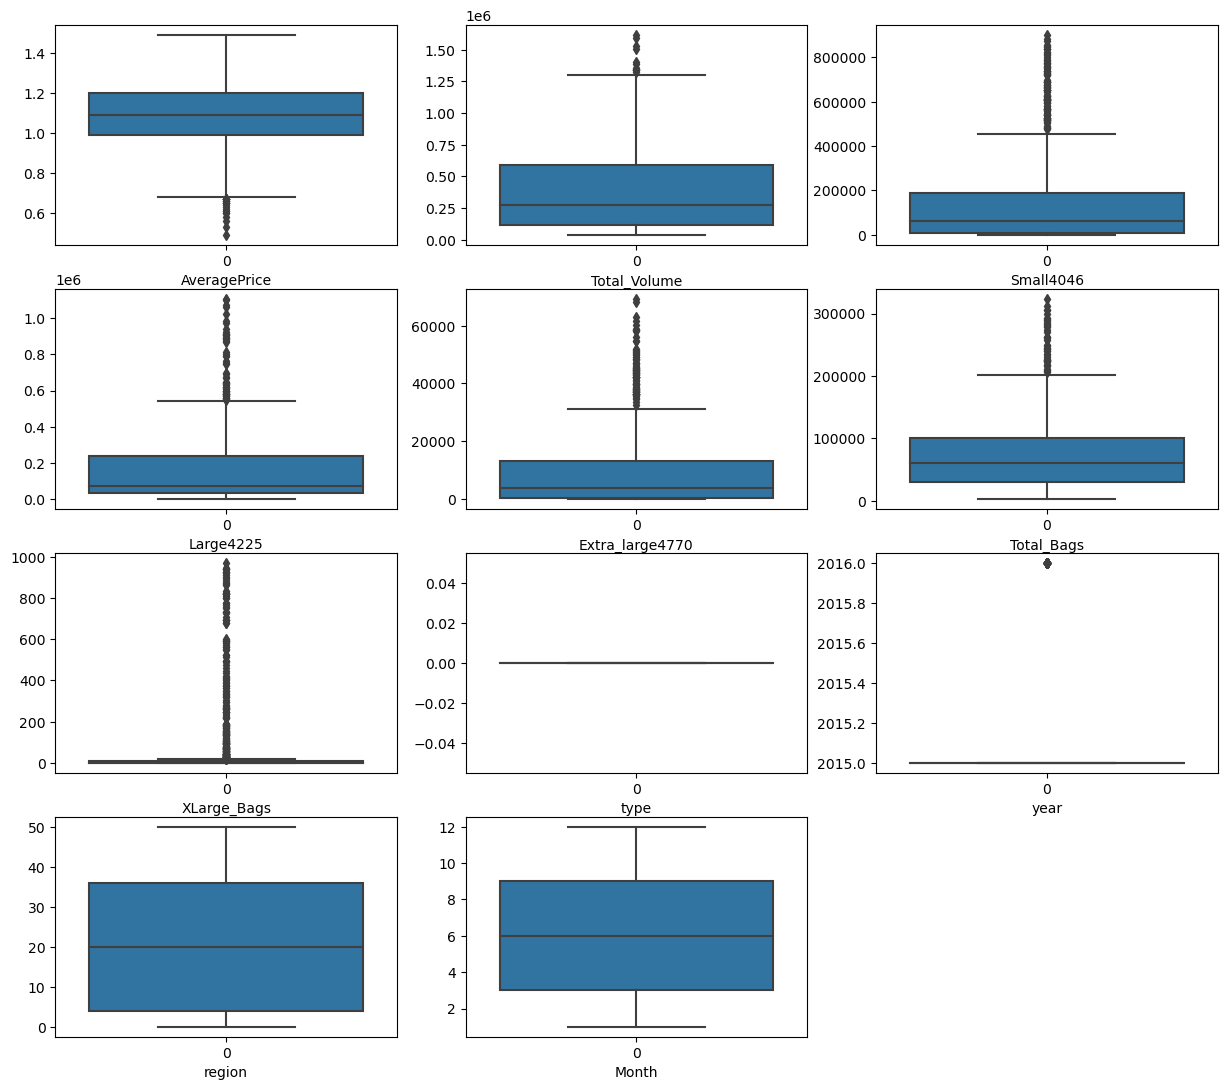

In [37]:
plt.figure(figsize=(15,20))

plotnumber = 1

for c in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
#many oulietrs has been treated not completly but mostly 
#needs to treat for lower side also for average price

In [38]:
df.skew()

AveragePrice      -0.454064
Total_Volume       1.072657
Small4046          1.847132
Large4225          1.808816
Extra_large4770    2.093281
Total_Bags         1.489537
XLarge_Bags        3.428426
type               0.000000
year               2.160365
region             0.149817
Month              0.124532
dtype: float64

In [39]:
df["XLarge_Bags"] = np.log1p(df["XLarge_Bags"])


In [40]:
df["Extra_large4770"] = np.log1p(df["Extra_large4770"])

In [41]:
df["Small4046"] = np.log1p(df["Small4046"])

In [42]:
df["Large4225"] = np.log1p(df["Large4225"])

In [43]:
df["Total_Bags"] = np.log1p(df["Total_Bags"])

In [44]:
df["Total_Volume"] = np.log1p(df["Total_Volume"])
#columns have been corrected by using log1p 

In [45]:
df.skew()

AveragePrice      -0.454064
Total_Volume      -0.079000
Small4046         -0.544851
Large4225         -0.281749
Extra_large4770   -0.514291
Total_Bags        -0.496466
XLarge_Bags        1.451719
type               0.000000
year               2.160365
region             0.149817
Month              0.124532
dtype: float64

In [46]:
x = df.drop('AveragePrice',axis = 1)
y = df['AveragePrice']
#split data into feature and target varibale 

In [47]:
scaler= StandardScaler()
x_scaler = scaler.fit_transform(x)
#data  standarized has been done

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge,LassoCV , RidgeCV,Lasso 

from xgboost import XGBRegressor    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
#all the necassary liabraries that required for building a model

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [50]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.4021128617979791
mean_squared_error: 0.02051606466214818
Squareroot_mean_squared_error 0.14323429988012013
Root Mean Squared Log Error   -1.943273528834443


In [51]:
test_score =  LinearRegression.score(x_train,y_train)
test_score
#test score

0.36311624976428114

In [52]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)
#copmring acutal  vs predcted 

,Actual,Predict
221,1.25,1.168144
942,0.93,0.939022
547,1.04,1.197776
106,1.09,1.087239
982,0.99,0.952039
...,...,...
753,1.34,1.186886
518,0.95,1.082312
814,1.19,1.265153
35,1.22,1.298865


In [53]:
lin_reg=LinearRegression
maxR2_score=0
maxRS=0
for i in range(1,250):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=.25)
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)
#R2 with 2 different tecniques also 

Best R2 Score is 0.46681226921643304 on Random_state 233


In [54]:
cv_score = (cross_val_score(lin_reg, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check       

Cross Validation Score: -2.4327477653222007


In [55]:
# Ridge:
from sklearn.linear_model import RidgeCV
Ridge = RidgeCV()
Ridge = Ridge.fit(x_train, y_train)

# Prediction:
y_pred = Ridge.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.37492856023290666
mean_squared_error: 0.02003325543489257
Squareroot_mean_squared_error 0.14153888312012558
Root Mean Squared Log Error   -1.9551808072789738


In [56]:
cv_score = (cross_val_score(Ridge, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: -2.3378180258862757


In [58]:
#RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(x_test)
# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))


r2_score: 0.8223321383729506
mean_squared_error: 0.005694174182509506
Squareroot_mean_squared_error 0.07545975207028914
Root Mean Squared Log Error   -2.584155850029304


In [59]:
cv_score = (cross_val_score(RandomForestRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 27.26496113774017


In [110]:
#hyper parameter tunning  for RandomForestRegressor


#hyper parameter tunning 
grid_params = para = {"n_estimators":[100,200,300],
       "max_depth":[2,3,4,5],
       "max_features":["auto", "sqrt", "log2"]}

grid = GridSearchCV(estimator=RandomForestRegressor,
                   param_grid = grid_params,
                   cv = 5)

In [118]:
grid_search_RF = GridSearchCV(RandomForestRegressor(),para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_RF.fit(x_train,y_train)
print(grid_search_RF.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}


In [117]:
##hyper parameter tunning 
from sklearn.ensemble import RandomForestRegressor 
Final_mod =  RandomForestRegressor(n_estimators=200 , max_depth= 5, max_features = 'log2',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print(' R2 Score of Final Model' )
print(r2_score(y_test,y_pred)) 
print('\n')

Mean absolute error : 0.08186627858932756
Mean squared error : 0.010805688828461871
Root Mean Squared Error: 0.10395041523948748


 R2 Score of Final Model
0.6628442393881913




In [69]:
#Decision_Tree
Decision_Tree = DecisionTreeRegressor()
Decision_Tree = Decision_Tree.fit(x_train, y_train)

# Prediction:
y_pred = Decision_Tree.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.611438108835344
mean_squared_error: 0.012453231939163497
Squareroot_mean_squared_error 0.1115940497480197
Root Mean Squared Log Error   -2.1928875481264383


In [70]:
cv_score = (cross_val_score(Decision_Tree, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: -18.253351194450964


In [75]:
#KNeighborsRegressor
KNeighborsRegressor = KNeighborsRegressor()
KNeighborsRegressor = KNeighborsRegressor.fit(x_train, y_train)

# Prediction:
y_pred = KNeighborsRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.6773707217722564
mean_squared_error: 0.010340121673003801
Squareroot_mean_squared_error 0.10168638882861265
Root Mean Squared Log Error   -2.2858618213780098


In [76]:
cv_score = (cross_val_score(KNeighborsRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: -22.44374901160242


In [92]:
##hyper parameter tunning 
knn=KNeighborsRegressor()
grid_para = {"n_neighbors":[5,7,10,12],
            "weights":["uniform", "distance"],
            "algorithm" :["auto", "ball_tree", "kd_tree", "brute"],
            "p" :[1,2]}
grid_search_KNN = GridSearchCV(knn,grid_para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_KNN.fit(x_train,y_train)
print(grid_search_KNN.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [93]:
grid_search_KNN.best_score_

0.6526017293760746

In [94]:
##hyper parameter tunning 
from sklearn.neighbors import KNeighborsRegressor
Final_mod =  KNeighborsRegressor(algorithm ='auto' ,n_neighbors = 5, p=1 , weights = 'distance')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print(' R2 Score of Final Model' )
print(r2_score(y_test,y_pred)) 
print('\n')

Mean absolute error : 0.06337078121374577
Mean squared error : 0.0070143434722330375
Root Mean Squared Error: 0.08375167742936876
 R2 Score of Final Model
0.7811406245251058




In [97]:
#GradientBoostingRegressor
from sklearn.ensemble import  GradientBoostingRegressor
GradientBoostingRegressor = GradientBoostingRegressor()
GradientBoostingRegressor = GradientBoostingRegressor.fit(x_train, y_train)

# Prediction:
y_pred = GradientBoostingRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.7486534781148979
mean_squared_error: 0.008055541743312182
Squareroot_mean_squared_error 0.08975266983946596
Root Mean Squared Log Error   -2.410697504541256


In [96]:
cv_score = (cross_val_score(GradientBoostingRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 26.77721589071919


In [82]:
#AdaBoostRegressor
AdaBoostRegressor = AdaBoostRegressor()
AdaBoostRegressor = AdaBoostRegressor.fit(x_train, y_train)

# Prediction:
y_pred = AdaBoostRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.6605187257515415
mean_squared_error: 0.010880220483143915
Squareroot_mean_squared_error 0.10430829537071304
Root Mean Squared Log Error   -2.260404386382414


In [83]:
cv_score = (cross_val_score(AdaBoostRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 34.15479184959604


In [84]:
#XGBRegressor
XGBRegressor = XGBRegressor()
XGBRegressor = XGBRegressor.fit(x_train, y_train)

# Prediction:
y_pred = XGBRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.8169750160901176
mean_squared_error: 0.005865867515879429
Squareroot_mean_squared_error 0.07658895165674634
Root Mean Squared Log Error   -2.569302446884482


In [85]:
cv_score = (cross_val_score(XGBRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 8.221299535776192


In [86]:
XGBRegressor = XGBRegressor
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators' : [100, 200],
}
gridSearchCV = GridSearchCV(XGBRegressor,param_grid=param_grid,n_jobs=-1)

In [87]:
gridSearchCV.fit(x_train,y_train)
gridSearchCV.best_score_

gridSearchCV.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 200}

In [88]:
##hyper parameter tunning 
from xgboost import XGBRegressor    
Final_mod =  XGBRegressor(n_estimators = 200 , max_depth= 7,
             min_samples_leaf = 3, min_samples_split = 10)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print(' R2 Score of Final Model' )
print(r2_score(y_test,y_pred)) 
print('\n')

[23:26:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

Mean absolute error : 0.05734939259721299
Mean squared error : 0.005765082108980541
Root Mean Squared Error: 0.07592813779476315


 R2 Score of Final Model
0.8201196911831169




In [89]:
#As we already mentioned that dataset had lot of missing value which we handled. Outlier and skewness also get corrected.We have done analysis and check the trend also. i have checked correlation

In [ ]:
#i have checked GridSreach CV on Randomforest and KNN. 
#Using GridSreachCV on randomforest because it was overfit model and though of that by hyperparameter tuning we can save the overfitting but KNN is working robust in this situation. 
#we have seen that cross_val_score at 4 iteration, it isgood other than that. 
#Thus it is the better that other. we will save the same model for future us